In [1]:
import sys
from plottinglib.plotting_vr_logs import *
if 'plottinglib.plotting_vr_logs' in sys.modules:
    del sys.modules['plottinglib.plotting_vr_logs']
    from plottinglib.plotting_vr_logs import *
    
file = "../logs/crown_12062024_091414.json"
plot_experiment(file)

No experiment found: e is NONE


In [ ]:
!pip3 install cellworld

In [ ]:
from plottinglib.plotting_vr_logs import *
import sys
if 'plottinglib.plotting_vr_logs' in sys.modules:
    del sys.modules['plottinglib.plotting_vr_logs']
    from plottinglib.plotting_vr_logs import *

data = ExperimentData()
data.load_from_file(file)

### Get Latest log in folder 

In [51]:
import math 
d = 235.185 * 1 # diam * scale
s = d / 2 # side length
a = s * math.sqrt(3) / 2
print(a)
sa = a / s
sa
math.sqrt(3) / 2

101.8380922945216


0.8660254037844386

In [1]:
def get_newest_file_in_folder(folder_path:str='../logs', extension="*."):
    import os
    import glob
    if extension == "*":
        search_pattern = os.path.join(folder_path, "*")
    else:
        search_pattern = os.path.join(folder_path, f"*.{extension}")
    files = glob.glob(search_pattern)
    if not files:
        return None
    
    newest_file = max(files, key=os.path.getmtime)
    return newest_file

folder_path = "../logs"  # Replace with the path to your folder
extension = "json"  # Replace with the desired file extension (e.g., 'txt', 'jpg', 'py')
newest_file = get_newest_file_in_folder(folder_path, extension)
print(newest_file)

../logs\test_02072025_162416.json


# Crown 10/18/2024
## Alexander 

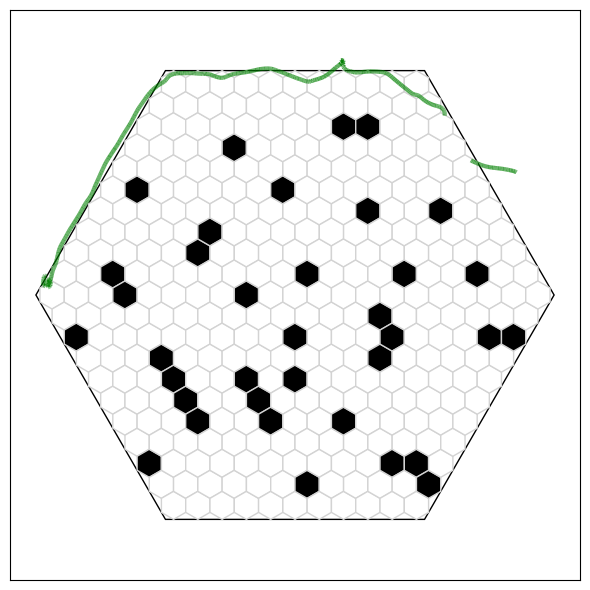

In [8]:
import cellworld as cw
import math
file = get_newest_file_in_folder("../logs", "json")
occlusions = '21_05'
w = cw.World.get_from_parameters_names('hexagonal',"canonical",occlusions)
d = cw.Display(w, fig_size=(6,6), padding=0.1, cell_edge_color="lightgrey", background_color="white", habitat_edge_color="black")
exp = cw.Experiment.load_from_file(file)

for episode in exp.episodes:
  t = episode.trajectories
  ht = t.get_agent_trajectory('prey')
  d.add_trajectories(ht, colors = {'prey': 'green'}, alphas = {'prey': 0.7})
  # d.ax.plot(ht.get('location').get('x'), [((y*math.sqrt(3)*0.5)  + 0.5-math.sqrt(3)/4) for y in ht.get('location').get('y')], color='green', alpha=0.7)

In [ ]:
## show summary info of trajectories 
# show time steps 

def detect_outliers(array):
    import numpy as np 
    mean = np.mean(array)
    std = np.std(array)
    lower_bound = mean - std
    upper_bound = mean + std
    outliers = array[(array < lower_bound) | (array > upper_bound)]
    
    if len(outliers) > 0:
        return f"Outliers detected: {outliers}"
    else:
        return "No outliers detected"
    
def show_info(filepath:str=None):
    import numpy as np
    if not filepath: print("need a filepath"); return

    e = Experiment.load_from_file(filepath)
    if e is None: 
        print("No experiment found: e is NONE")
        return 
    
    w = World.get_from_parameters_names('hexagonal',"canonical",e.occlusions)
    subject_str = 'prey'
    scalar = 1.0
    mv = 1.0
    print(f'Episode count: {len(e.episodes)}')
    grads = []
    for i, episode in enumerate(e.episodes[:]):
        t = episode.trajectories
        tprey = t.get_agent_trajectory('prey')
        tpred = t.get_agent_trajectory('predator')
        
        frame_list = tprey.get('frame')
        nv = [f/(max(frame_list)) for f in frame_list]
        grad = np.gradient(nv)
        grads.append(grad)

    return grads
    
g = show_info(file)

In [ ]:
# file = '/mnt/c/Users/MacIver/Research/BotEvade/CellworldServer/main/cpp/robot_controller/logs/labtest_08202024_164619.json'
e = Experiment.load_from_file(file)
w = World.get_from_parameters_names('hexagonal',"canonical",e.occlusions)
subject_str = 'prey'
scalar = 1.0
mv = 1.0
print(f'Episode count: {len(e.episodes)}')
import numpy as np 
gp = []
gpp = []
for i, episode in enumerate(e.episodes[:]):
    t = episode.trajectories
    tprey = t.get_agent_trajectory('prey')
    frame_list = tprey.get('frame')
    gpp.append(tprey.get_locations())
    
xt = tprey.get('location').get('x')
tjson = tprey.get('time_stamp')
t = np.array(list(tjson)) - tjson[0]
plt.plot(t,xt,'--o')
# gpp = np.gradient(np.gradient(xt))
# print(gpp)
# print(np.where(np.nonzero(gpp)))
# xt = tprey.get_locations().get('prey').get('y')

In [ ]:
np.array(list(t)) - t[0]

In [ ]:
df = tprey.to_dataframe()
df.time_stamp

In [ ]:
import numpy as np
fs = 1/g[0][0]
print(fs)
np.where(np.nonzero(np.gradient(g[0])))[1]